In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score

# 1 Aquisição dos dados

In [2]:
(xTrain, yTrain), (xTest, yTest) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, y_train = shuffle(xTrain, yTrain)

In [4]:
x_test, y_test = shuffle(xTest, yTest)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


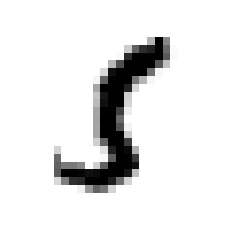

5


In [6]:
plt.imshow(x_train[1660], cmap="binary")
plt.axis('off')
plt.show()
print((y_train[1660]))

# 2 Pré-processamento

In [7]:
# Criar um conj de validação de 5k e mudar a escala dos pixels de 0-255 para 0-1 (float)
x_valid, x_train = x_train[:5000] / 255., x_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.

# 3 Construindo a arquitetura

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
hidden1 = model.layers[1]

In [11]:
weights, biases = hidden1.get_weights()

In [12]:
weights.shape

(784, 300)

In [13]:
biases.shape

(300,)

In [14]:
hidden2 = model.layers[2]

In [15]:
weights, biases = hidden2.get_weights()

In [16]:
weights.shape

(300, 100)

In [17]:
output = model.layers[3]

In [18]:
weights, biases = output.get_weights()

In [19]:
weights.shape

(100, 10)

In [20]:
biases.shape

(10,)

# 4 Treinamento

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## 4.1 epochs=15

In [22]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6092 - accuracy: 0.8438 - val_loss: 0.3382 - val_accuracy: 0.9024
Epoch 2/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2835 - accuracy: 0.9196 - val_loss: 0.2691 - val_accuracy: 0.9234
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2329 - accuracy: 0.9334 - val_loss: 0.2280 - val_accuracy: 0.9342
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1990 - accuracy: 0.9436 - val_loss: 0.2011 - val_accuracy: 0.9420
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1750 - accuracy: 0.9500 - val_loss: 0.1825 - val_accuracy: 0.9470
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1553 - accuracy: 0.9558 - val_loss: 0.1656 - val_accuracy: 0.9520
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1398 - accuracy: 0.9604 - val_loss: 0.1527 - val_accurac

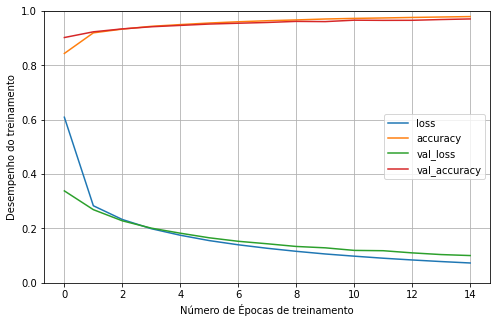

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 4.2 epochs=30

In [24]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0681 - accuracy: 0.9813 - val_loss: 0.0974 - val_accuracy: 0.9720
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0636 - accuracy: 0.9829 - val_loss: 0.0963 - val_accuracy: 0.9716
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0598 - accuracy: 0.9836 - val_loss: 0.0921 - val_accuracy: 0.9732
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0562 - accuracy: 0.9848 - val_loss: 0.0884 - val_accuracy: 0.9734
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9858 - val_loss: 0.0872 - val_accuracy: 0.9756
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0493 - accuracy: 0.9869 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0463 - accuracy: 0.9878 - val_loss: 0.0883 - val_accuracy:

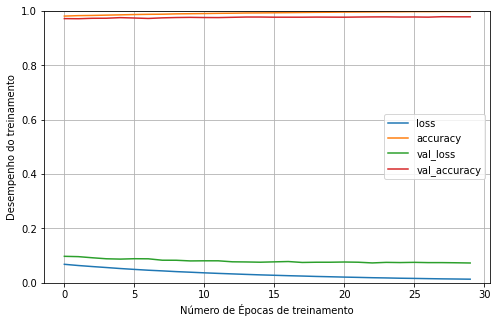

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 4.3 epochs=45

In [26]:
history = model.fit(x_train, y_train, epochs=45, validation_data=(x_valid, y_valid))

Epoch 1/45
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0126 - accuracy: 0.9985 - val_loss: 0.0738 - val_accuracy: 0.9790
Epoch 2/45
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0120 - accuracy: 0.9987 - val_loss: 0.0758 - val_accuracy: 0.9772
Epoch 3/45
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0114 - accuracy: 0.9989 - val_loss: 0.0723 - val_accuracy: 0.9784
Epoch 4/45
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0110 - accuracy: 0.9990 - val_loss: 0.0743 - val_accuracy: 0.9788
Epoch 5/45
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0105 - accuracy: 0.9991 - val_loss: 0.0733 - val_accuracy: 0.9780
Epoch 6/45
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0101 - accuracy: 0.9989 - val_loss: 0.0754 - val_accuracy: 0.9766
Epoch 7/45
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.0745 - val_accuracy:

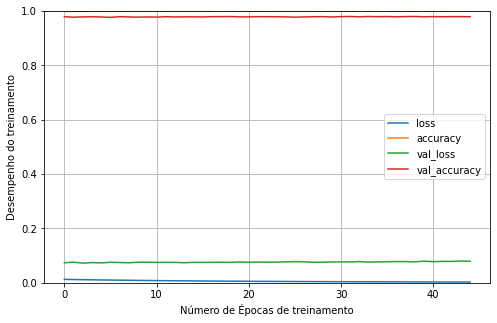

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5 Teste

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9801


[0.07399558275938034, 0.9800999760627747]

In [29]:
x_new = x_test[:10]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.14, 0.  , 0.03, 0.  , 0.  , 0.  , 0.83],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred

array([9, 1, 6, 1, 5, 2, 0, 2, 6, 2])

In [31]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [32]:
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.9801
Kappa:  0.9778799693551985
Matriz de confusão: 
 [[ 970    0    1    1    1    1    3    1    2    0]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   5    3 1009    3    1    0    1    6    4    0]
 [   2    0    3  994    0    5    0    1    1    4]
 [   1    0    3    1  969    0    2    1    1    4]
 [   3    0    0    8    1  866    7    1    3    3]
 [   4    3    0    1    5    4  939    0    2    0]
 [   1    5    6    2    1    0    0 1005    1    7]
 [   3    0    3    5    3    3    2    3  949    3]
 [   2    3    0    5   12    2    1    6    4  974]]


# 6 Salvando o modelo

In [33]:
import os
os.chdir('/content/drive/MyDrive/Sistemas_de_Informação/Sistemas inteligentes/RESOLUÇÕES/atv_06/')

In [34]:
model.save("modelo_mlp.h5")

In [35]:
model = keras.models.load_model("modelo_mlp.h5")

In [36]:
np.argmax(model.predict(x_test), axis=-1)

array([9, 1, 6, ..., 9, 5, 6])

In [37]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [38]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9790
Epoch 2/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9792
Epoch 3/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 0.0792 - val_accuracy: 0.9798
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9798
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9790
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9792
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0800 - val_accurac